In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

In [2]:

def print_history(history, i, eval_model):  
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    accuracy = history.history['accuracy']
    val_accuracy = history.history['val_accuracy']

    # Graficación de la pérdida durante el entrenamiento y la validación
    plt.figure(figsize=(12, 4))

    plt.subplot(1, 2, 1)
    plt.plot(loss, label=f'Training Loss - Configuration {i}')
    plt.plot(val_loss, label=f'Validation Loss - Configuration {i}')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title(f'Training and Validation Loss -\nBetter Loss {eval_model[0]}')
    plt.legend()

    # Graficación de la precisión durante el entrenamiento y la validación
    plt.subplot(1, 2, 2)
    plt.plot(accuracy, label=f'Training Accuracy - Configuration {i}')
    plt.plot(val_accuracy, label=f'Validation Accuracy - Configuration {i}')
    plt.axhline(y=eval_model[1], color='r', linestyle='--', label=f'Test Accuracy - Configuration {i}')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.title(f'Training and Validation Accuracy\nBest Accuracy {eval_model[1]}')
    plt.legend()

    plt.subplots_adjust(wspace=0.5)  # Ajusta el espacio entre los subplots horizontalmente
    plt.tight_layout()
    plt.show()
def convertir_mes_a_numero(fecha):
    if len(fecha) == 5 and fecha[1] == '-' and fecha[2:].isdigit():
        return fecha  
    
    meses = {
        'Jan': '1', 'Feb': '2', 'Mar': '3', 'Apr': '4',
        'May': '5', 'Jun': '6', 'Jul': '7', 'Aug': '8',
        'Sep': '9', 'Oct': '10', 'Nov': '11', 'Dec': '12'
    }
    if len(fecha) == 6 and fecha[2] == '-' and fecha[:2].isdigit():
        numero_mes = meses.get(fecha[3:])
        if numero_mes:
            return f"{int(fecha[:2])}-{numero_mes.zfill(2)}"
    
    partes = fecha.split('-')
    numero_mes = meses.get(partes[0])
    if numero_mes:
        return f"{numero_mes}-{partes[1]}"
    else:
        return fecha 

In [3]:
data_test = pd.read_csv("submission-ds.csv")
data_test
data_test['Edad'] = data_test['Edad'].apply(convertir_mes_a_numero)
data_test['Duración de la Clase'] = data_test['Duración de la Clase'].apply(convertir_mes_a_numero)

In [4]:
datam1 = pd.read_csv("Data_m1.csv")
datam2 = pd.read_csv("Data_train_categoric_as_num.csv")
datam3 = pd.read_csv("Data_train_normalize.csv")

In [5]:
display(datam1)
display(datam2)
display(datam3)

,Nivel de Adaptación,Tipo de Red_2G,Tipo de Red_3G,Tipo de Red_4G,Estudiante de Tecnología_No,Estudiante de Tecnología_Si,Nivel de Educación_Colegio,Nivel de Educación_Escuela,Nivel de Educación_Universidad,Vive en Ciudad_No,...,Tipo de Internet_Compra Megas,Tipo de Internet_Wifi,Situación Financiera_Buena,Situación Financiera_Mala,Situación Financiera_Media,Género_Femenino,Género_Masculino,Duración de la Clase_0,Duración de la Clase_1-03,Duración de la Clase_3-06
0,0,0,1,0,0,1,0,0,1,0,...,0,1,0,0,1,0,1,0,0,1
1,1,0,1,0,1,0,0,1,0,0,...,1,0,0,0,1,1,0,0,1,0
2,0,0,1,0,0,1,0,0,1,0,...,1,0,0,1,0,0,1,0,1,0
3,1,0,1,0,0,1,0,1,0,0,...,1,0,0,0,1,0,1,0,1,0
4,2,0,0,1,0,1,0,0,1,0,...,0,1,1,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
959,1,0,1,0,1,0,0,0,1,0,...,1,0,0,0,1,0,1,0,1,0
960,1,0,1,0,1,0,0,1,0,0,...,1,0,0,0,1,1,0,0,1,0
961,0,0,0,1,1,0,0,0,1,0,...,1,0,0,0,1,0,1,1,0,0
962,1,0,1,0,1,0,0,0,1,0,...,1,0,0,0,1,0,1,0,1,0


,Tipo de Red,Estudiante de Tecnología,Nivel de Educación,Vive en Ciudad,Tipo de Instituto,Edad,Dispositivo,Tipo de Internet,Situación Financiera,Género,Duración de la Clase,Nivel de Adaptación
0,1,1,2,1,0,3,0,1,2,1,2,1
1,1,0,1,1,0,1,1,0,2,0,1,2
2,1,1,2,1,0,3,1,0,1,1,1,1
3,1,1,1,1,0,1,1,0,2,1,1,2
4,2,1,2,1,0,3,0,1,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
959,1,0,2,1,0,3,1,0,2,1,1,2
960,1,0,1,1,0,1,1,0,2,0,1,2
961,2,0,2,1,1,3,1,0,2,1,0,1
962,1,0,2,1,0,3,1,0,2,1,1,2


,Tipo de Red,Estudiante de Tecnología,Nivel de Educación,Vive en Ciudad,Tipo de Instituto,Edad,Dispositivo,Tipo de Internet,Situación Financiera,Género,Duración de la Clase,Nivel de Adaptación
0,-1.240771,1.722521,1.103632,0.524531,-0.675421,0.735289,-2.228075,1.155050,0.558508,0.901127,1.767815,1
1,-1.240771,-0.580544,-0.278058,0.524531,-0.675421,-0.920829,0.310772,-0.865763,0.558508,-1.109721,-0.080530,2
2,-1.240771,1.722521,1.103632,0.524531,-0.675421,0.735289,0.310772,-0.865763,-1.103225,0.901127,-0.080530,1
3,-1.240771,1.722521,-0.278058,0.524531,-0.675421,-0.920829,0.310772,-0.865763,0.558508,0.901127,-0.080530,2
4,0.710458,1.722521,1.103632,0.524531,-0.675421,0.735289,-2.228075,1.155050,-2.764958,0.901127,-0.080530,0
...,...,...,...,...,...,...,...,...,...,...,...,...
959,-1.240771,-0.580544,1.103632,0.524531,-0.675421,0.735289,0.310772,-0.865763,0.558508,0.901127,-0.080530,2
960,-1.240771,-0.580544,-0.278058,0.524531,-0.675421,-0.920829,0.310772,-0.865763,0.558508,-1.109721,-0.080530,2
961,0.710458,-0.580544,1.103632,0.524531,1.480558,0.735289,0.310772,-0.865763,0.558508,0.901127,-1.928874,1
962,-1.240771,-0.580544,1.103632,0.524531,-0.675421,0.735289,0.310772,-0.865763,0.558508,0.901127,-0.080530,2


In [6]:
x = datam1.drop('Nivel de Adaptación' , axis = 1)
y = datam1['Nivel de Adaptación']
x_train1 , x_test1 , y_train1 , y_test1 = train_test_split(pd.get_dummies(x) , y , test_size = 0.2 , random_state = 42)


In [7]:
X_encod = datam2.drop('Nivel de Adaptación' , axis = 1)
y_encod = datam2['Nivel de Adaptación']
x_train_encod , x_test_encod , y_train_encod , y_test_encod = train_test_split(X_encod , y_encod , test_size = 0.2 , random_state = 42)

In [8]:
X_norm = datam3.drop('Nivel de Adaptación' , axis = 1)
y_norm = datam3['Nivel de Adaptación']
x_train_norm , x_test_norm , y_train_norm , y_test_norm = train_test_split(X_norm , y_norm , test_size = 0.2, random_state = 32 )

In [28]:
def run_model(ep, bat_size,max_neur,x_train  , y_train, activation_function1='relu', activation_function2='relu', activation_function_out='softmax'):
    model = tf.keras.models.Sequential([
        tf.keras.layers.InputLayer(input_shape = x_train.shape[1:]),
        tf.keras.layers.Dense(int(max_neur/2) , activation = 'relu'),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Dense(max_neur , activation = activation_function1),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Dropout(0.2) ,
        tf.keras.layers.Dense(100 , activation = activation_function2),
        tf.keras.layers.Dense(3 , activation = activation_function_out)
    ])

    model.compile(
        loss='sparse_categorical_crossentropy',
        optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
        metrics=['accuracy']
    )

    callback = tf.keras.callbacks.EarlyStopping(
        monitor='val_loss',
        patience=10,
        restore_best_weights=True
    )

    history = model.fit(
        x_train,
        y_train,
        epochs=ep,
        validation_split=0.2,
        batch_size=bat_size,
        callbacks=[callback]
    )
    return history, model

Experimento con diferentes parametros 

In [29]:
def evaluate_models(X_train, y_train,X_test, y_test ):
    ep=50
    i=0
    bat_size=64
    max_nue=33
    list_history = []
    list_model = []
    evaluation_results = [] 
    better_conf= []
    while i<9:
        if(i<3):    
            history,model=run_model(ep,bat_size,max_nue,X_train,y_train)
        if(i>2 and i<6):
            history,model=run_model(ep,bat_size,max_nue,X_train,y_train, 'gelu', 'relu')
        if(i>5 ):
            history,model=run_model(ep,bat_size,max_nue,X_train,y_train, 'relu', 'elu')
        list_history.append(history)
        list_model.append(model)
        better_conf.append((ep,bat_size,max_nue))
        ep=ep+ep
        i+=1
        max_nue+=33
        loss_encod , acc_encod =model.evaluate(X_test, y_test)
        evaluation_results.append((loss_encod,acc_encod))
    return list_history,evaluation_results,better_conf,list_model

Data tipo 1

In [30]:
list_history,evaluation_results,better_conf,list_model=evaluate_models(x_train1, y_train1,x_test1,y_test1)


Epoch 1/50
10/10 [==============================] - 2s 27ms/step - loss: 1.2534 - accuracy: 0.4221 - val_loss: 1.0511 - val_accuracy: 0.4194
Epoch 2/50
10/10 [==============================] - 0s 8ms/step - loss: 0.9120 - accuracy: 0.5276 - val_loss: 1.0016 - val_accuracy: 0.5097
Epoch 3/50
10/10 [==============================] - 0s 9ms/step - loss: 0.8014 - accuracy: 0.6445 - val_loss: 0.9723 - val_accuracy: 0.5677
Epoch 4/50
10/10 [==============================] - 0s 8ms/step - loss: 0.7587 - accuracy: 0.6477 - val_loss: 0.9530 - val_accuracy: 0.5484
Epoch 5/50
10/10 [==============================] - 0s 9ms/step - loss: 0.7168 - accuracy: 0.6753 - val_loss: 0.9381 - val_accuracy: 0.5871
Epoch 6/50
10/10 [==============================] - 0s 9ms/step - loss: 0.6865 - accuracy: 0.7110 - val_loss: 0.9238 - val_accuracy: 0.6000
Epoch 7/50
10/10 [==============================] - 0s 8ms/step - loss: 0.6774 - accuracy: 0.7110 - val_loss: 0.9039 - val_accuracy: 0.6129
Epoch 8/50
10/10 [=

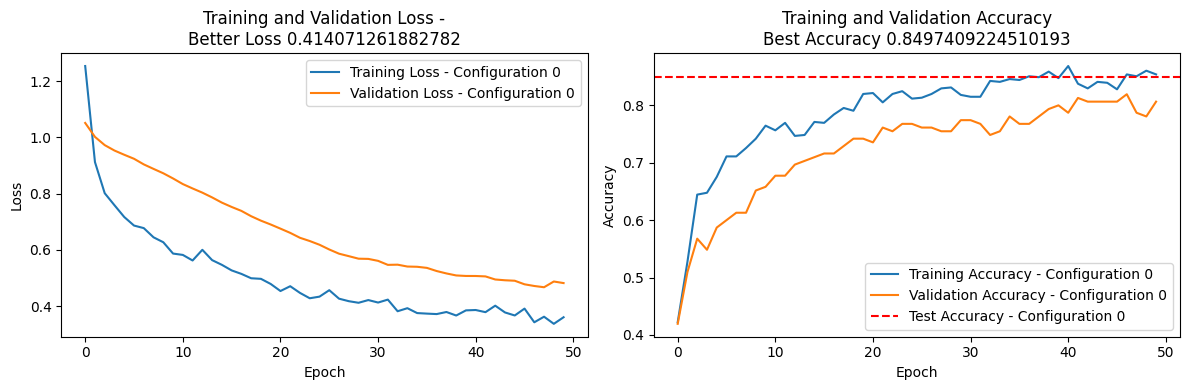

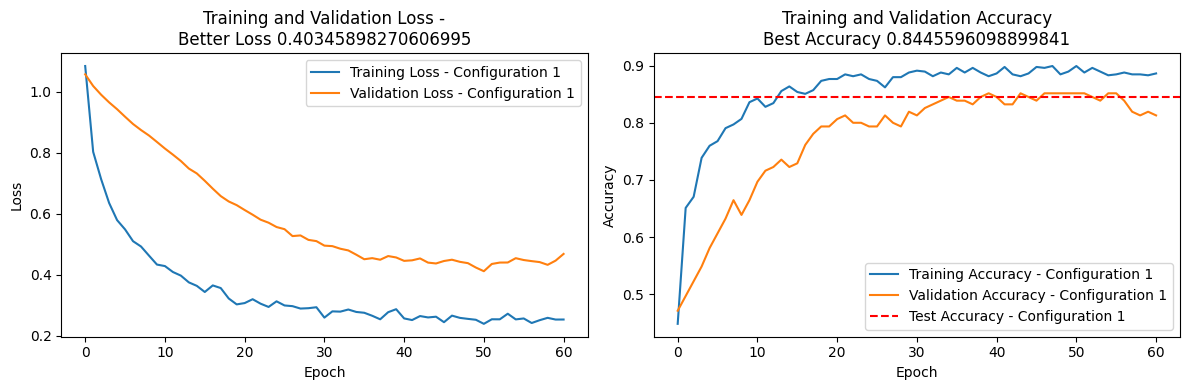

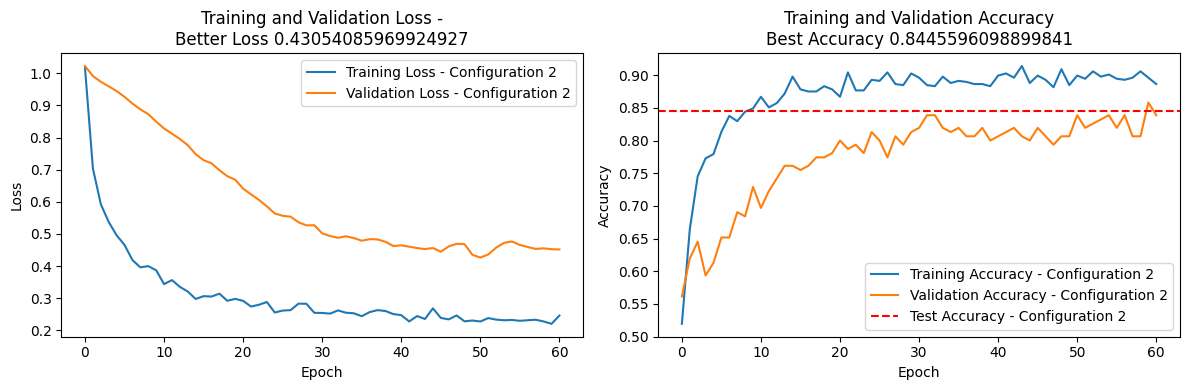

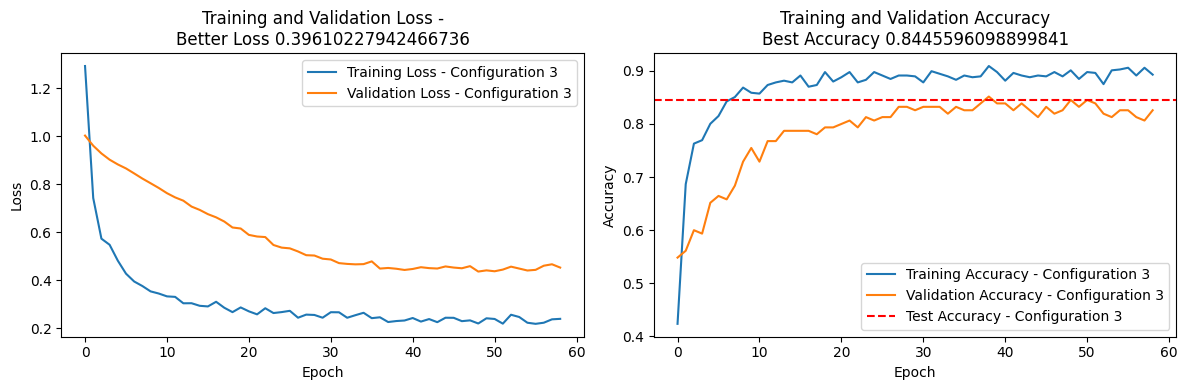

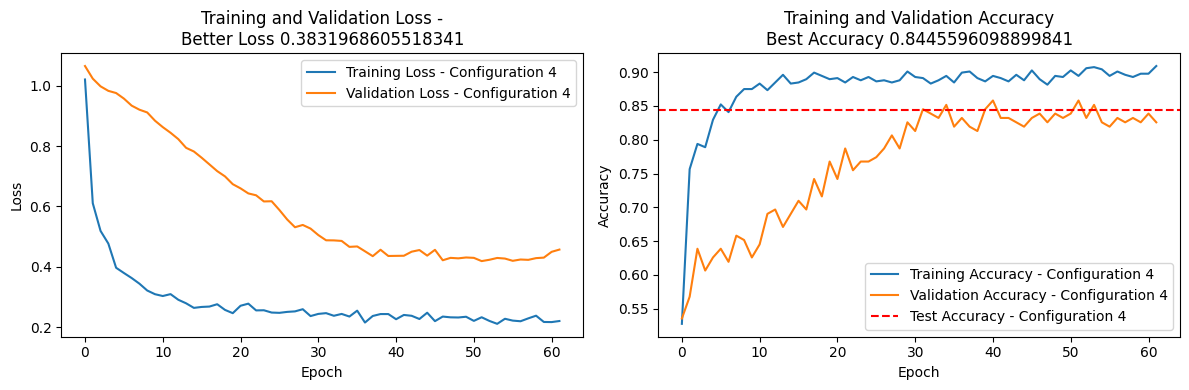

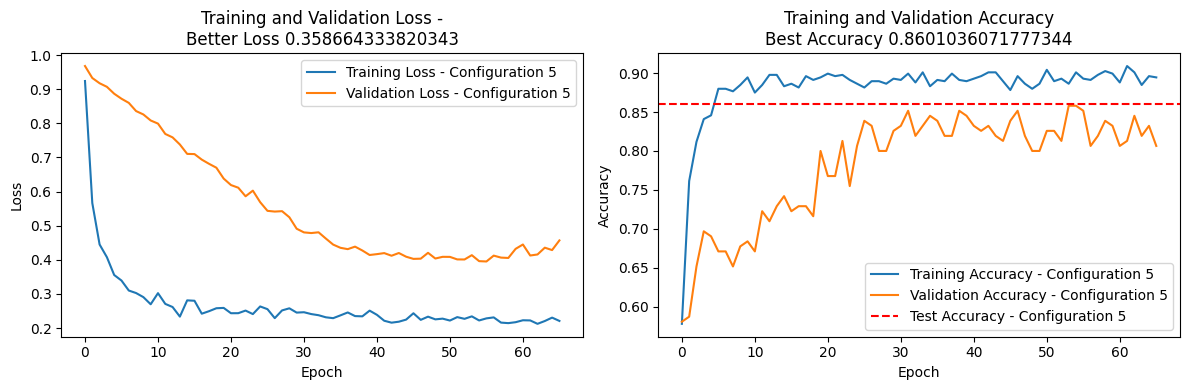

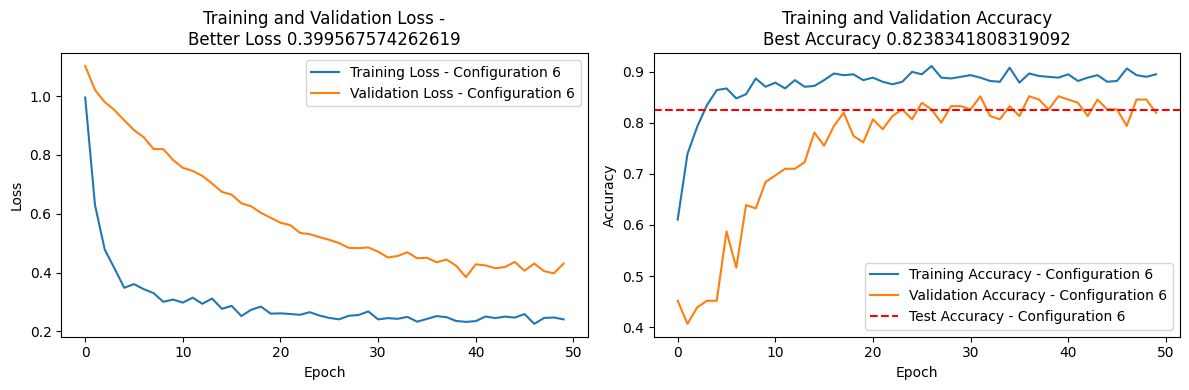

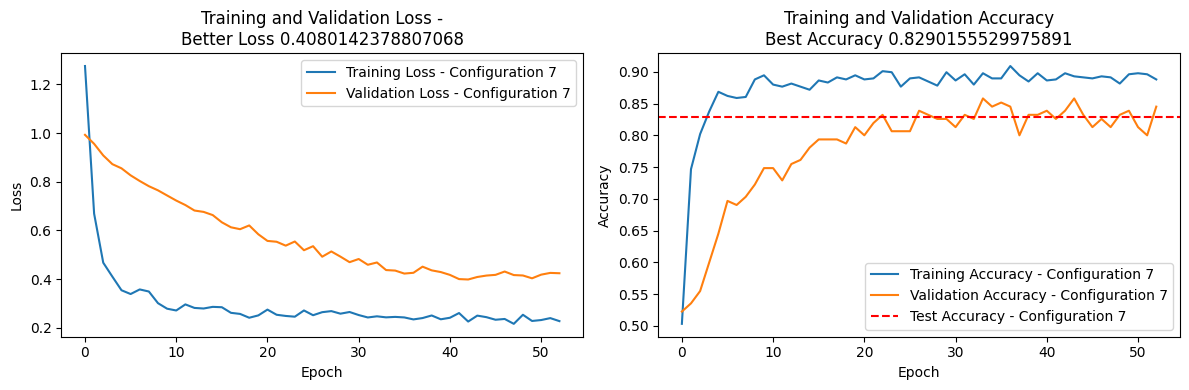

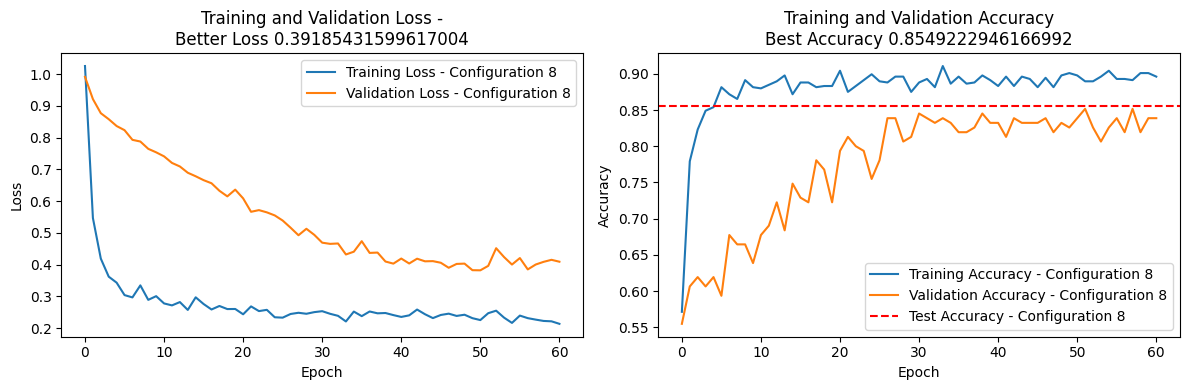

In [31]:
i=0
for hist in list_history:
    
    print_history(hist,i,evaluation_results[i])
    i+=1

In [13]:
list_model[8].evaluate(x_train1,y_train1)

25/25 [==============================] - 0s 3ms/step - loss: 0.3264 - accuracy: 0.8716


[0.32640179991722107, 0.8715953230857849]

In [14]:
#data_test1 =pd.get_dummies(data_test)
#pedict_m1= list_model[8].predict(data_test1)
#predict_model1 = pedict_m1.argmax(axis=1)
#print(predict_model1)

In [15]:
##resultados_prediccion1 = pd.DataFrame({
 #   'id': range(1, len(predict_model1) + 1),
  #  'Nivel de Adaptación': predict_model1
#})
#resultados_prediccion1['Nivel de Adaptación'] = resultados_prediccion1['Nivel de Adaptación'].map({0: 'Bajo', 1: 'Moderado', 2: 'Alto'})

#print(resultados_prediccion1)
#resultados_prediccion1.to_csv('resultados_prediccion_m1_3.csv', index=False)

data tipo 2

In [16]:
list_history,evaluation_results,better_conf,list_model=evaluate_models(x_train_encod, y_train_encod,x_test_encod,y_test_encod)


Epoch 1/50
5/5 [==============================] - 2s 70ms/step - loss: 1.2210 - accuracy: 0.4497 - val_loss: 1.0437 - val_accuracy: 0.4968
Epoch 2/50
5/5 [==============================] - 0s 14ms/step - loss: 0.9014 - accuracy: 0.6347 - val_loss: 1.0855 - val_accuracy: 0.4968
Epoch 3/50
5/5 [==============================] - 0s 19ms/step - loss: 0.8680 - accuracy: 0.6542 - val_loss: 0.9812 - val_accuracy: 0.4968
Epoch 4/50
5/5 [==============================] - 0s 17ms/step - loss: 0.7687 - accuracy: 0.6786 - val_loss: 0.9159 - val_accuracy: 0.4968
Epoch 5/50
5/5 [==============================] - 0s 18ms/step - loss: 0.7081 - accuracy: 0.6802 - val_loss: 0.9081 - val_accuracy: 0.5032
Epoch 6/50
5/5 [==============================] - 0s 15ms/step - loss: 0.6840 - accuracy: 0.6932 - val_loss: 0.9039 - val_accuracy: 0.5097
Epoch 7/50
5/5 [==============================] - 0s 17ms/step - loss: 0.6465 - accuracy: 0.7143 - val_loss: 0.9079 - val_accuracy: 0.4968
Epoch 8/50
5/5 [===========

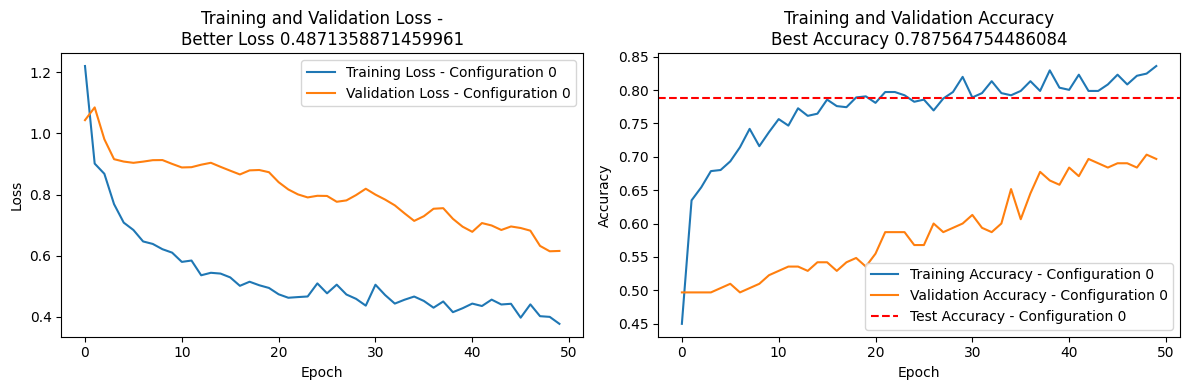

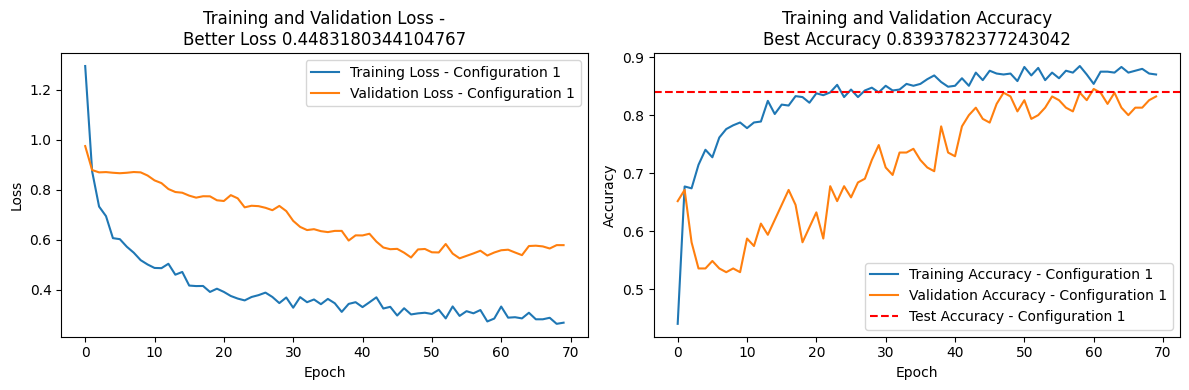

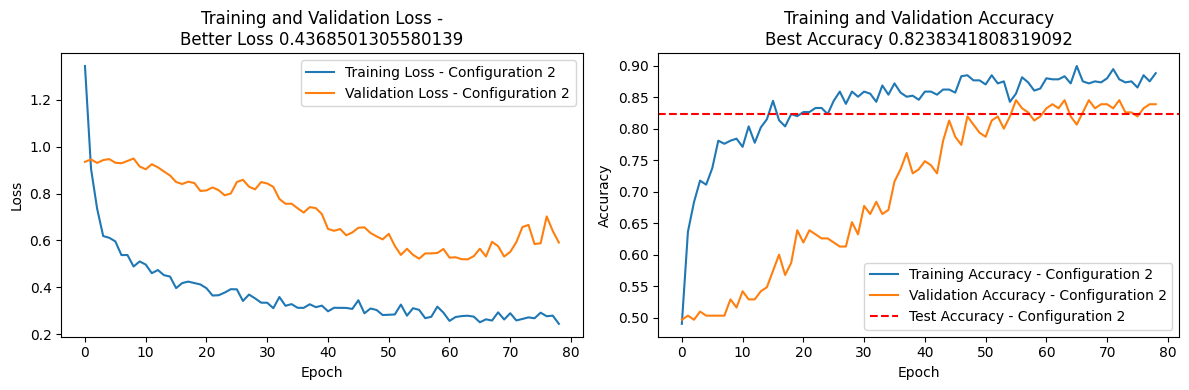

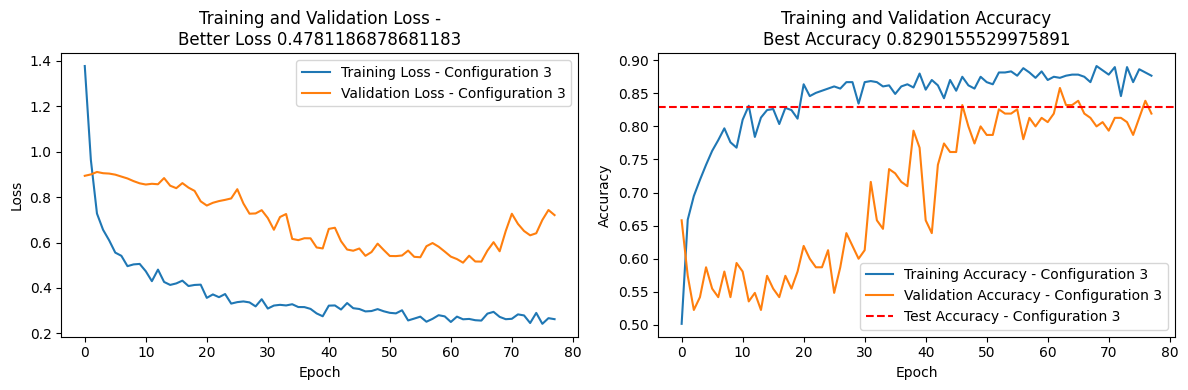

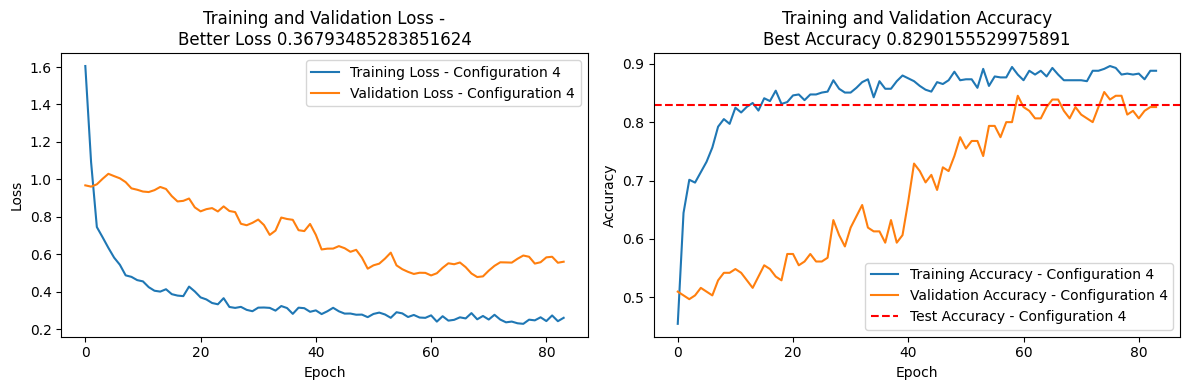

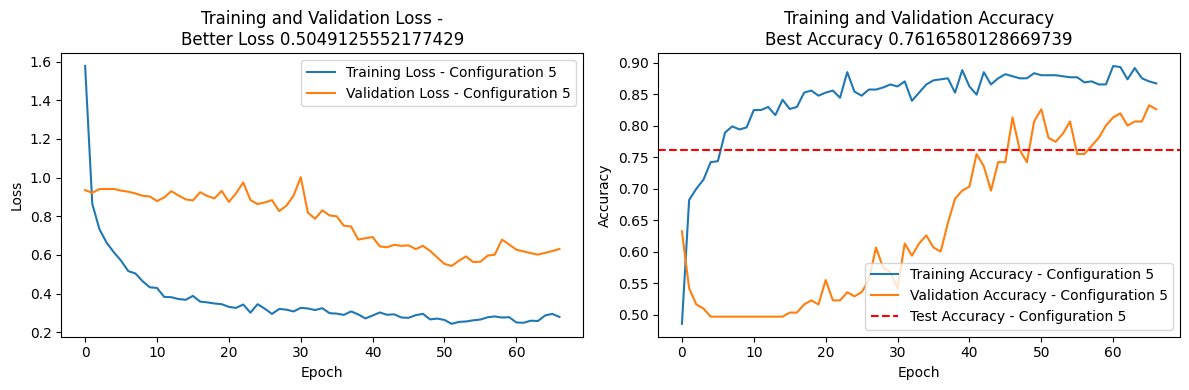

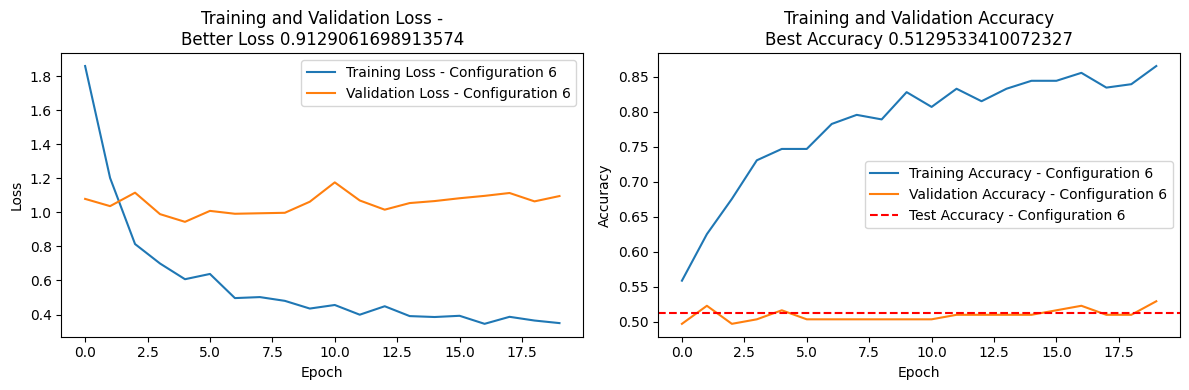

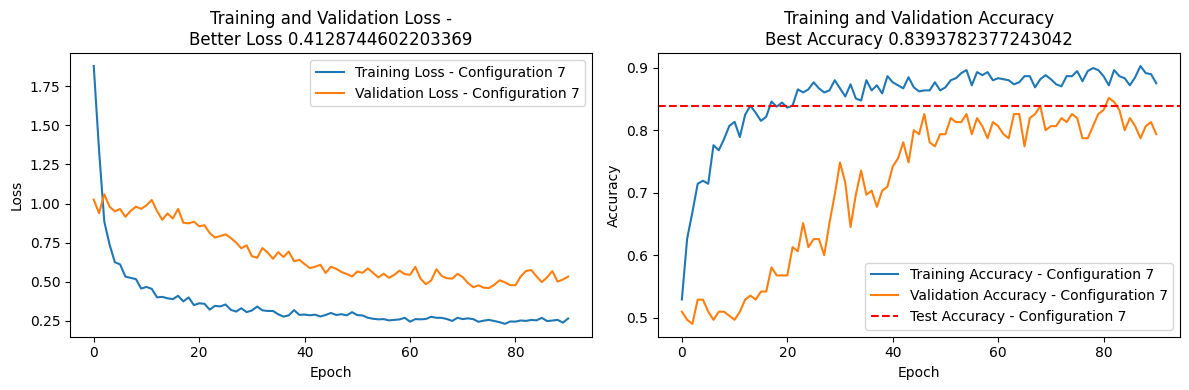

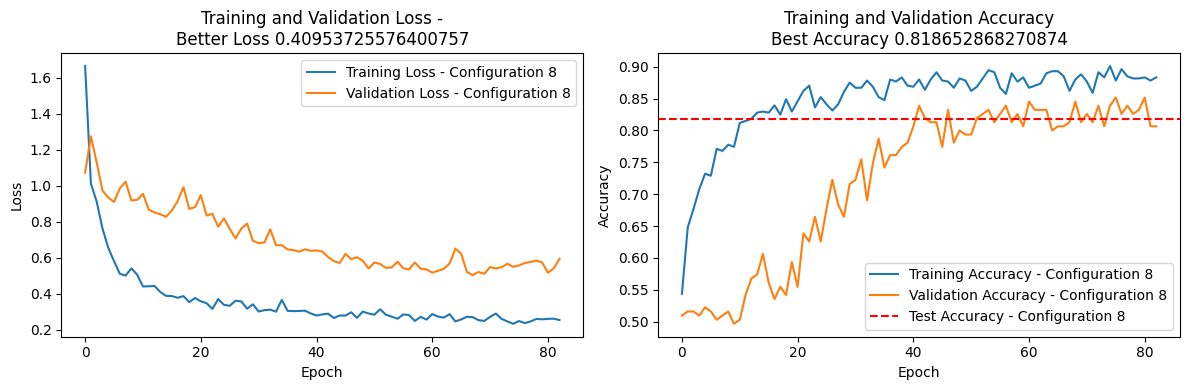

In [17]:
i=0
for hist in list_history:
    
    print_history(hist,i,evaluation_results[i])
    i+=1

DAta tipo 3

In [18]:
list_historyn,evaluation_resultsn,better_conf,list_model=evaluate_models(x_train_norm, y_train_norm,x_test_norm,y_test_norm)


Epoch 1/50
5/5 [==============================] - 2s 80ms/step - loss: 1.2467 - accuracy: 0.4659 - val_loss: 0.8848 - val_accuracy: 0.6903
Epoch 2/50
5/5 [==============================] - 0s 19ms/step - loss: 0.8795 - accuracy: 0.6445 - val_loss: 0.8054 - val_accuracy: 0.7097
Epoch 3/50
5/5 [==============================] - 0s 15ms/step - loss: 0.7501 - accuracy: 0.6721 - val_loss: 0.7840 - val_accuracy: 0.7032
Epoch 4/50
5/5 [==============================] - 0s 15ms/step - loss: 0.7070 - accuracy: 0.6558 - val_loss: 0.7733 - val_accuracy: 0.7226
Epoch 5/50
5/5 [==============================] - 0s 16ms/step - loss: 0.6664 - accuracy: 0.6623 - val_loss: 0.7623 - val_accuracy: 0.7419
Epoch 6/50
5/5 [==============================] - 0s 16ms/step - loss: 0.6599 - accuracy: 0.7192 - val_loss: 0.7463 - val_accuracy: 0.7548
Epoch 7/50
5/5 [==============================] - 0s 17ms/step - loss: 0.6325 - accuracy: 0.7354 - val_loss: 0.7361 - val_accuracy: 0.7613
Epoch 8/50
5/5 [===========

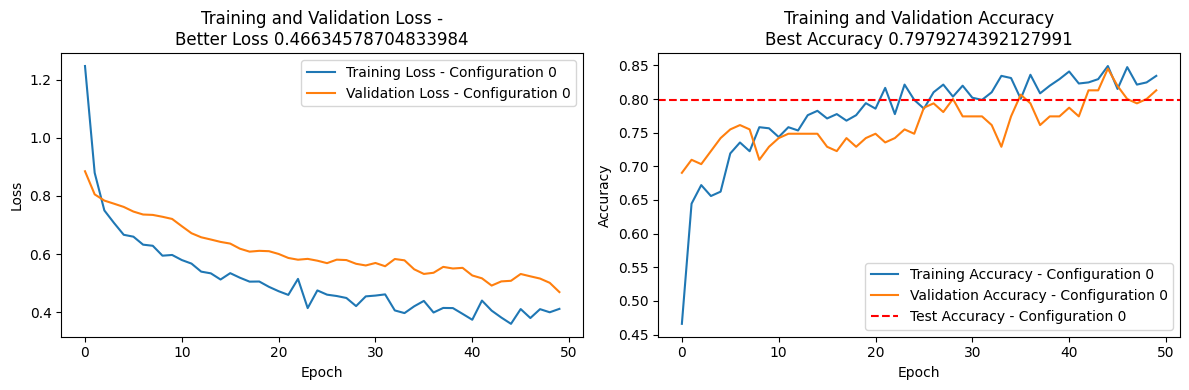

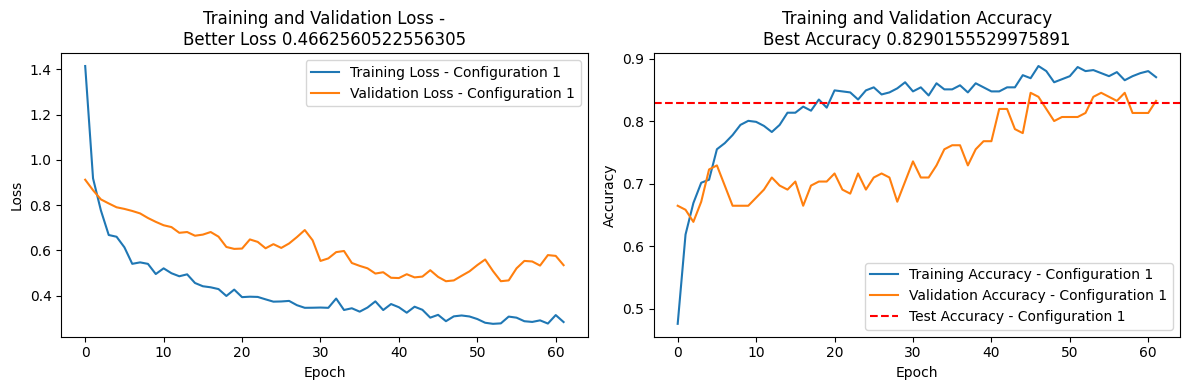

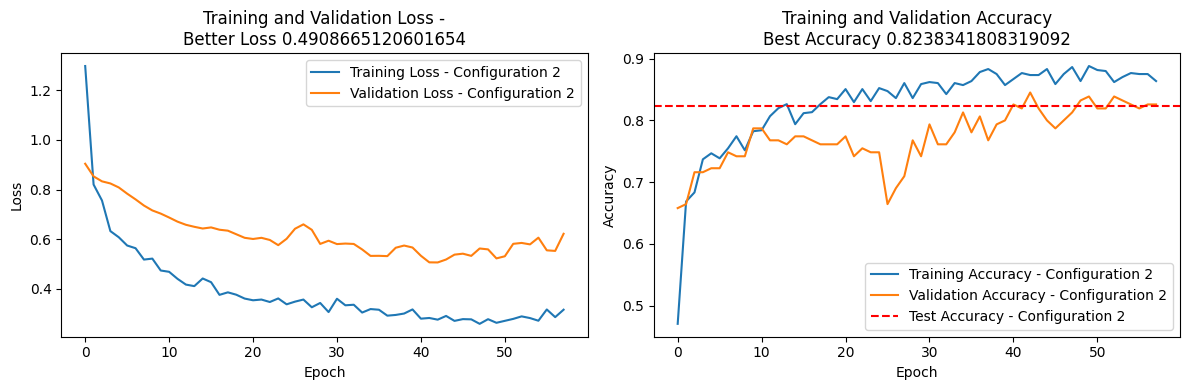

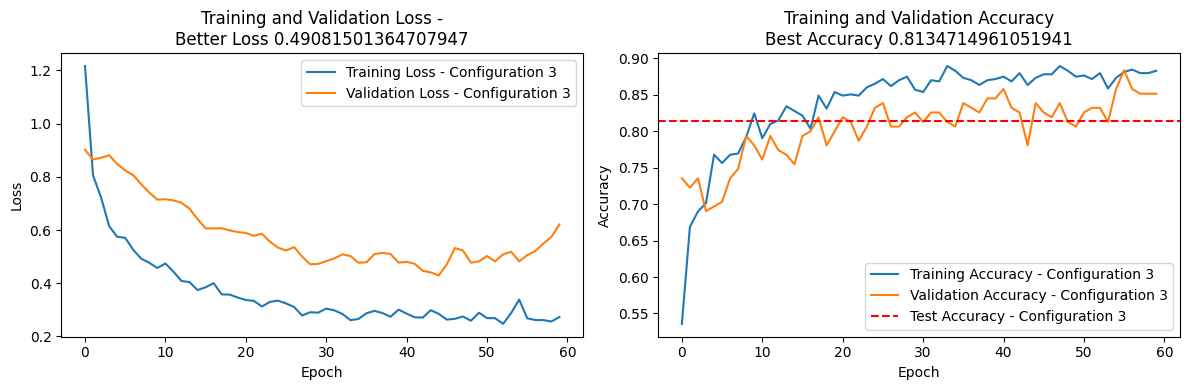

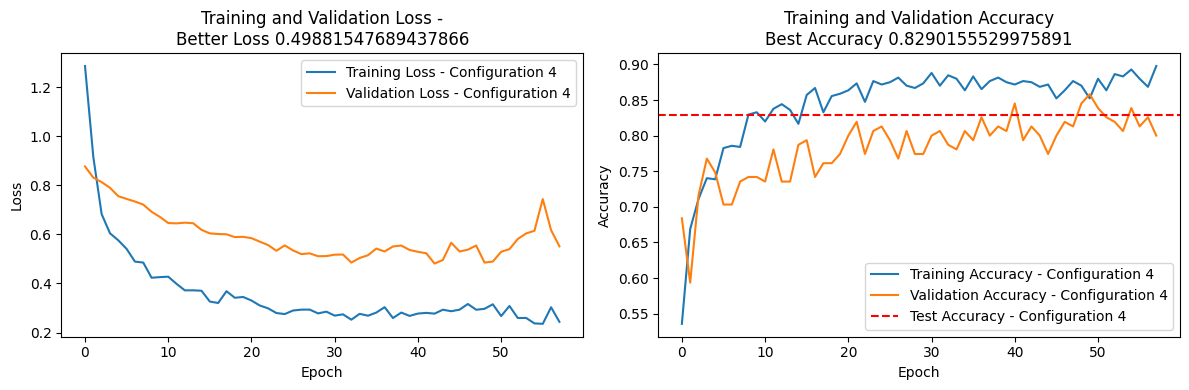

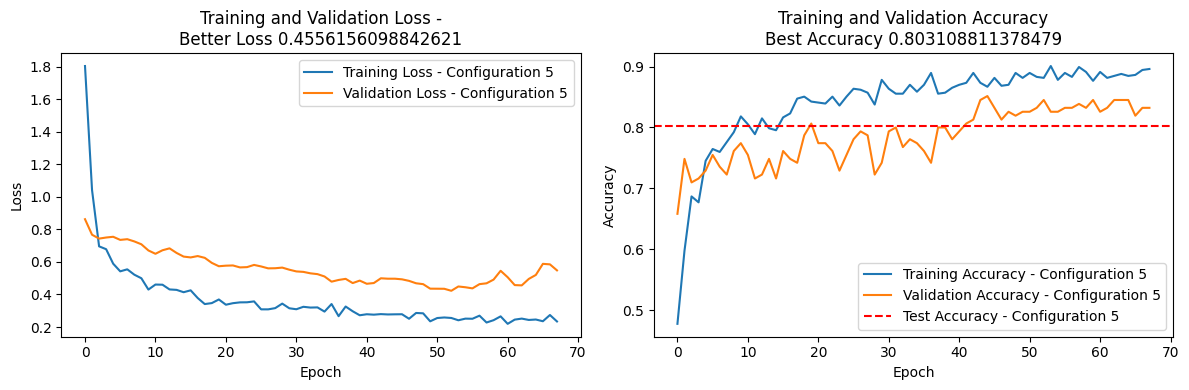

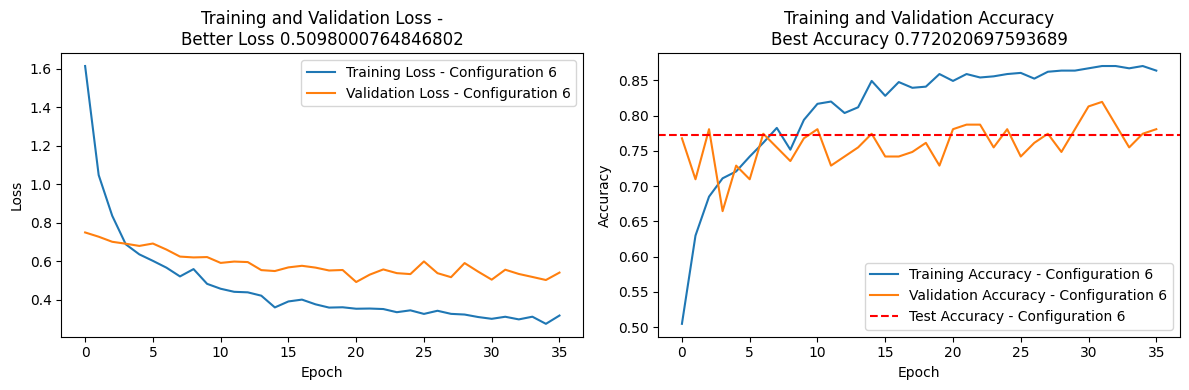

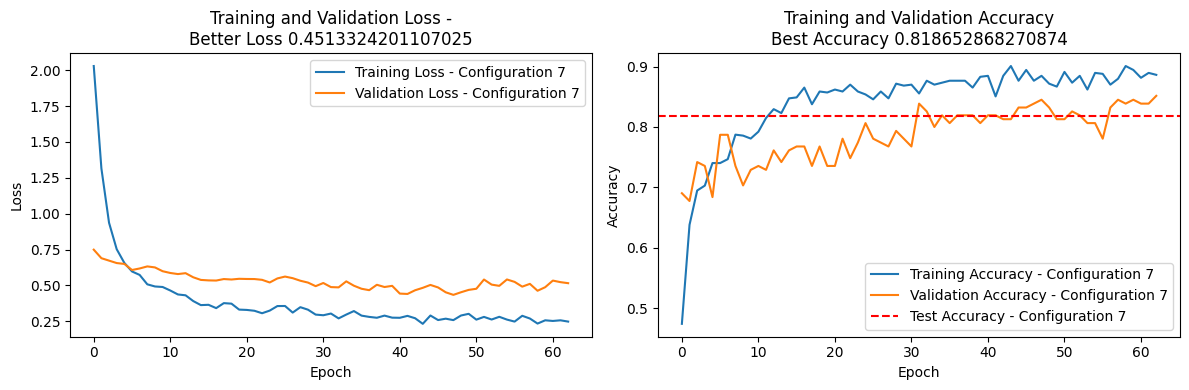

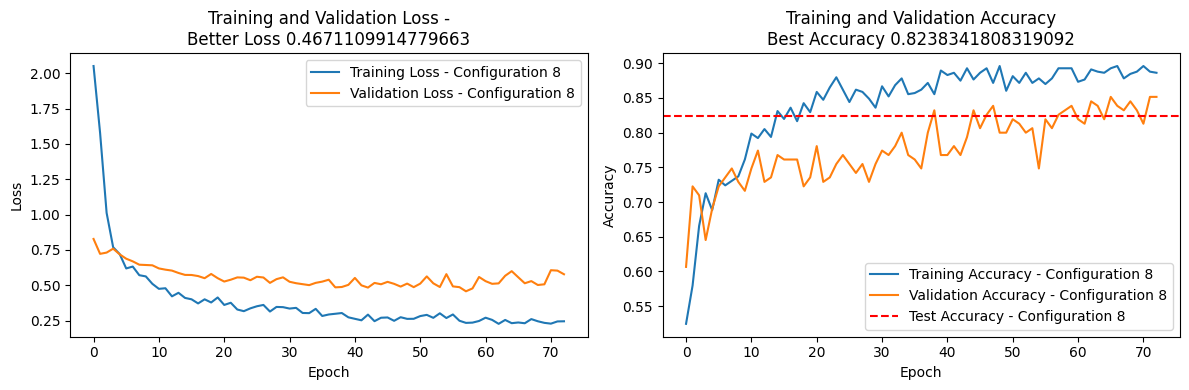

In [19]:
i=0
for hist in list_historyn:
    
    print_history(hist,i,evaluation_resultsn[i])
    i+=1

### Conclusion
Considerando que no se tiene un data set grande, esto implica que si realizamos un numero pequeño de epocs nos puede dar un sobre ajuste, las funciones de activacion son importantes a la hr de entrenar nuestro modelo ya que estas estan diseñadas para conjuntos de datos especificos por eso se recomiendo analizar el tipo de problema a resolver. Si bien es sabido que para ver que hiiper parametros nos conviene utilizar, existen algunos metodos ya elaborados en nuestro caso no pudimos ponerlos a prueba por eso se decidio hacer una ejecucion enviandole diferentes configuraciones de hiperparametros y funciones de activacion no es lo optimo pero es lo que nos resulto para experimentar podemos ver como el modelo propuesto corta los epocs cuando detecta un punto muerto o punto de overfitting 

In [75]:
from sklearn.preprocessing import LabelEncoder


data_test = data_test.apply(LabelEncoder().fit_transform)
data_test

,Tipo de Red,Estudiante de Tecnología,Nivel de Educación,Vive en Ciudad,Tipo de Instituto,Edad,Dispositivo,Tipo de Internet,Situación Financiera,Género,Duración de la Clase
0,1,0,0,0,1,3,1,0,1,1,1
1,2,0,0,0,0,2,1,1,2,0,1
2,2,0,2,1,1,3,1,0,2,1,0
3,1,1,2,0,1,3,1,0,2,1,1
4,1,0,1,0,1,5,1,0,2,0,0
...,...,...,...,...,...,...,...,...,...,...,...
236,2,0,1,1,0,0,1,1,2,0,1
237,2,0,1,1,0,0,1,0,2,0,1
238,2,0,1,1,0,1,1,0,2,1,1
239,2,0,1,1,1,2,1,1,2,1,1


XGBoost es un método de aprendizaje automático supervisado para clasificación y regresión y se utiliza en la herramienta Entrenar con AutoML. XGBoost es la abreviatura de las palabras inglesas "extreme gradient boosting" (refuerzo de gradientes extremo). Este método se basa en árboles de decisión y supone una mejora sobre otros métodos, como el bosque aleatorio y refuerzo de gradientes. 

XGBoost emplea una serie de parámetros y técnicas para mejorar su algoritmo y ofrecer resultados superiores y un rendimiento mejorado:

Regularización: Utiliza un parámetro de regularización (lambda) al calcular las puntuaciones de similitud para reducir la sensibilidad a datos individuales y prevenir el sobreajuste.

Corte: Se selecciona un parámetro de complejidad de árboles (gamma) para comparar las ganancias. Al podar ramas donde la ganancia sea menor que el valor gamma, evita el sobreajuste al eliminar ramas innecesarias y reducir la profundidad de los árboles.

Boceto de Cuantil Ponderado: En lugar de evaluar cada posible valor como umbral para dividir los datos, utiliza cuantiles ponderados. Estos cuantiles se eligen mediante un algoritmo de boceto que estima una distribución en varios sistemas a través de una red.

Aprendizaje Paralelo: Divide los datos en bloques para procesarlos en paralelo y crear árboles o realizar otros cálculos.

Búsqueda de Divisiones Sensible a la Escasez: Maneja la escasez de datos probando ambas direcciones de una división y buscando una dirección predeterminada a través del cálculo de la ganancia.

Acceso Sensible al Caché: Utiliza la memoria caché del sistema para calcular puntuaciones de similitud y valores de salida. La memoria caché permite un acceso más rápido que la memoria principal, mejorando el rendimiento general del modelo.

Bloques para Cómputo Fuera de Núcleo: Se emplea para datasets grandes que no caben en la caché ni en la memoria principal y deben almacenarse en discos duros. Se dividen en bloques y se comprimen. La descompresión en la memoria es más rápida que la lectura directa, y se utiliza fragmentación si es necesario repartir los datos entre varios discos.

In [101]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
X = datam2.drop('Nivel de Adaptación', axis=1)
y = datam2['Nivel de Adaptación']
X_encoded = X
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)
model = XGBClassifier()
model.fit(X_train, y_train)
predictions = model.predict(data_test)
#Error al evaluar
#accuracy = accuracy_score(predictions)
#print(f'Accuracy: {accuracy:.2f}')


In [78]:
predictions

array([1, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 2, 2, 1, 1, 2, 1, 2, 2, 2, 1, 2,
       2, 2, 2, 1, 1, 1, 1, 2, 2, 1, 1, 2, 1, 1, 1, 2, 2, 1, 2, 1, 1, 1,
       1, 2, 2, 2, 1, 2, 2, 1, 2, 1, 2, 2, 1, 2, 2, 1, 2, 1, 1, 2, 1, 2,
       1, 1, 1, 2, 1, 2, 1, 2, 1, 2, 2, 1, 2, 2, 2, 2, 1, 2, 2, 0, 1, 1,
       1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 0, 1, 2, 2, 1, 1, 2, 2, 2,
       2, 1, 2, 1, 1, 2, 2, 2, 2, 1, 2, 1, 0, 1, 2, 1, 2, 1, 0, 1, 2, 1,
       2, 2, 2, 2, 1, 1, 1, 2, 2, 2, 2, 1, 2, 2, 2, 2, 0, 2, 2, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 1, 0, 2, 2, 1, 2, 0, 2, 1, 2, 2, 2, 2, 1, 1, 2,
       1, 1, 2, 1, 2, 1, 2, 1, 1, 2, 1, 2, 2, 2, 2, 2, 1, 2, 2, 1, 1, 1,
       1, 2, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 2, 1, 1, 2, 2, 1, 2, 1,
       2, 1, 1, 1, 2, 2, 2, 1, 2, 2, 2, 1, 0, 2, 1, 1, 2, 2, 2, 2, 2],
      dtype=int64)

In [81]:
resultados_prediccion = pd.DataFrame({
    'id': range(1, len(predictions) + 1),
    'Nivel de Adaptación': predictions
})
resultados_prediccion['Nivel de Adaptación'] = resultados_prediccion['Nivel de Adaptación'].map({0: 'Alto', 1: 'Bajo', 2: 'Moderado'})

# Mostrar el DataFrame con las etiquetas mapeadas
print(resultados_prediccion)
resultados_prediccion.to_csv('resultados_prediccion_XGboost.csv', index=False)

      id Nivel de Adaptación
0      1                Bajo
1      2                Bajo
2      3                Bajo
3      4                Bajo
4      5                Bajo
..   ...                 ...
236  237            Moderado
237  238            Moderado
238  239            Moderado
239  240            Moderado
240  241            Moderado

[241 rows x 2 columns]
